In [1]:
from methods.method import Window
win = Window((0.0, 0.0), (1.0, 1.0), 32,
             lambda x, y: (6 * (x ** 4) * y + 12 * (x ** 2) * (y ** 3)),
             lambda x, y: (x ** 4) * (y ** 3),
             lambda x, y: (x ** 4) * (y ** 3),
             lambda x, y: (x ** 4) * (y ** 3),
             lambda x, y: (x ** 4) * (y ** 3))

In [2]:
def compute(method):
    iters_acc = [[0.0 for i in range(3)] for j in range(3)]
    epss = [0.1, 0.01, 0.001]
    nums = [32, 64, 128]
    grid = []
    for i in range(len(nums)):
        for j in range(len(epss)):
            win.num = nums[i]
            win.update()
            print("Solving: num = ", win.num, ", eps =", epss[j])
            result = method.solve(win, epss[j])
            print("Solved: iters = ", result[1])
            iters_acc[i][j] = result[1]
            grid = result[0]
    return iters_acc, grid

In [3]:
from methods.jacobi import Jacobi
jacobi = Jacobi()
jacobi_results = compute(jacobi)
print(jacobi_results[0])

Solving: num =  32 , eps = 0.1
Solved: iters =  68
Solving: num =  32 , eps = 0.01
Solved: iters =  190
Solving: num =  32 , eps = 0.001
Solved: iters =  438
Solving: num =  64 , eps = 0.1
Solved: iters =  151
Solving: num =  64 , eps = 0.01
Solved: iters =  349
Solving: num =  64 , eps = 0.001
Solved: iters =  727
Solving: num =  128 , eps = 0.1
Solved: iters =  283
Solving: num =  128 , eps = 0.01
Solved: iters =  521
Solving: num =  128 , eps = 0.001
Solved: iters =  2074
[[68, 190, 438], [151, 349, 727], [283, 521, 2074]]


In [5]:
import scipy
x = scipy.linspace(0.0, 1.0, win.num + 1)
y = scipy.linspace(0.0, 1.0, win.num + 1)
[x, y] = scipy.meshgrid(x, y)
z = jacobi_results[1]

In [6]:
import pylab
figure = pylab.figure()

In [7]:
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(figure)
ax.plot_surface(x, y, z)

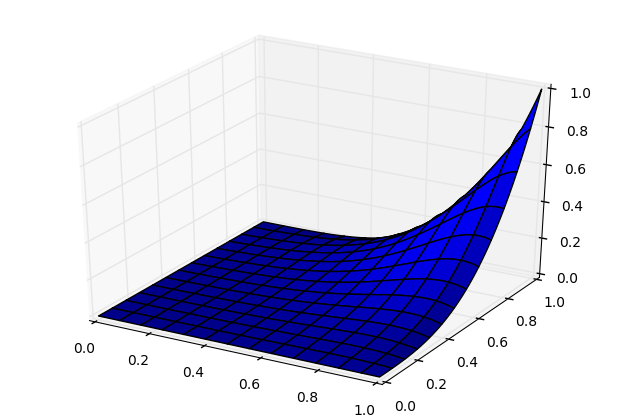

In [8]:
pylab.show()

In [9]:
from methods.gauss_seidel import GaussSeidel
gauss_seidel = GaussSeidel()
gauss_seidel_results = compute(gauss_seidel)
print(gauss_seidel_results[0])

Solving: num =  32 , eps = 0.1
Solved: iters =  67
Solving: num =  32 , eps = 0.01
Solved: iters =  174
Solving: num =  32 , eps = 0.001
Solved: iters =  401
Solving: num =  64 , eps = 0.1
Solved: iters =  143
Solving: num =  64 , eps = 0.01
Solved: iters =  386
Solving: num =  64 , eps = 0.001
Solved: iters =  1012
Solving: num =  128 , eps = 0.1
Solved: iters =  294
Solving: num =  128 , eps = 0.01
Solved: iters =  838
Solving: num =  128 , eps = 0.001
Solved: iters =  2235
[[67, 174, 401], [143, 386, 1012], [294, 838, 2235]]


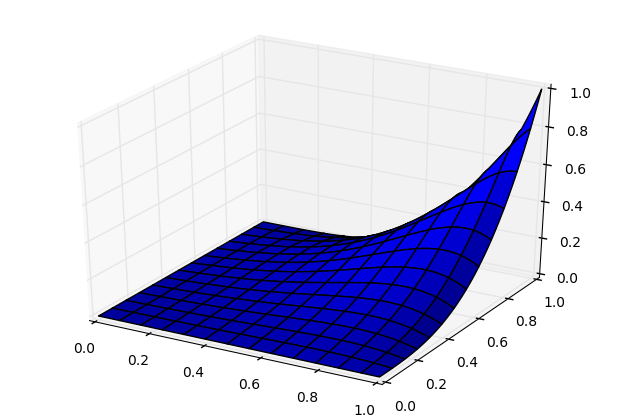

In [11]:
z = gauss_seidel_results[1]
figure2 = pylab.figure()
ax = Axes3D(figure2)
ax.plot_surface(x, y, z)
pylab.show()